**<center><font size=5>Correlação de variáveis em dados de EEG</font></center>**
**<center>Superdotados vs Grupo Controle</center>**
***
**author**: Ábner Lucas
**date**: Junho, 2022
**[GitHub Repository](https://github.com/abner-lucas)**

### Table of Contents
- <a href='#intro'>1. Visão Geral do Projeto</a> 
- <a href='#env'>2. Configurando o Ambiente</a>
 - <a href='#import'>2.1. Importando dados</a>
 - <a href='#var_des'>2.2. Descrição da variáveis</a>
- <a href='#sample'>3. Visualização da Amostra de Dados</a> 
 - <a href='#s1'>3.1. Amostra de dados por estímulo</a>
  - <a href='#s1_funcs'>3.1.1. Funções</a>
  - <a href='#s1_a1'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>
  - <a href='#s1_a2'>3.1.3 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>
  - <a href='#s1_a3'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>
  - <a href='#s1_a4'>3.1.5 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>
 - <a href='#s2'>3.2. Amostra de dados evocados</a>
  - <a href='#s2_funcs'>3.2.1 Funções</a>
  - <a href='#s2_a1'>3.2.2 Amostra da média dos trials: sujeito 5</a>
  - <a href='#s2_a2'>3.2.3 Amostra das médias dos sujeitos do grupo controle</a>
  - <a href='#s2_a3'>3.2.4 Amostra das médias dos sujeitos do grupo superdotado</a>

### <a id='intro'>1. Visão Geral do Projeto</a>

O conjunto de dados utilizado contém dados de [EEG (Electroencephalography)](https://pt.wikipedia.org/wiki/Eletroencefalografia) para dois grupos - Superdotados e Grupo de Controle.
<br><center>
![](https://i.imgur.com/ZrmxJRu.jpg)</center>
<br>A quantidade de sujeitos em cada grupo é 15 (criança/adolescente). Os 64 eletrodos foram colocados no couro cabeludo dos sujeitos para medir a atividade elétrica do cérebro. Os valores de resposta foram amostrados em segmentos de 4200Hz (1Hz = 1s = 1000ms). Cada sujeito foi exposto a no mínimo 120 e no máximo 160 estímulos com imagens semelhantes às utilizadas por [Ganis and Kievit (2015)](https://openpsychologydata.metajnl.com/articles/10.5334/jopd.ai/). Os participantes foram instruídos a julgar se as imagens eram “iguais” ou “diferentes”, em ambas as condições experimentais a imagem do lado direito foi girada em relação à imagem da esquerda e poderia ser normal ou invertida em espelho, no sentido horário em torno do eixo longitudinal em
incrementos de 50° de 0° a 150° (disparidade de ângulo). Para ambas as condições, um total de 80 tentativas foram apresentadas, com 20 tentativas para cada disparidade de ângulo (0°, 50°, 100° e 150°).

<b>O objetivo desta análise será observar as diferenças de amplitudes nos valores de resposta para diferentes estímulos (bem como suas médias) entre o grupo controle e o grupo superdotado, no intuito de predizer padrões para os dois grupos.</b>

### <a id='env'>2. Configurando o Ambiente</a>

#### <a id='import'>2.1. Importando os dados</a>

In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True) ## plotly iniciando
seed = 123
random.seed = seed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#filenames_list = os.listdir('../outputs_eeg/') # lista de nomes de arquivos no diretório
filenames_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/')
print('Quantidade total de arquivos no diretório: ' + str(len(filenames_list)))
print([x for x in filenames_list])

Quantidade total de arquivos no diretório: 76
['subject0015_ip.csv', 'subject0015_log.log', 'subject0015_trials.csv', 'subject0015_evoked.csv', 'subject0010_ip.csv', 'subject0010_log.log', 'subject0010_trials.csv', 'subject0010_evoked.csv', 'subject0018_ip.csv', 'subject0018_log.log', 'subject0018_trials.csv', 'subject0018_evoked.csv', 'subject0012_ip.csv', 'subject0012_log.log', 'subject0012_trials.csv', 'subject0012_evoked.csv', 'subject0006_ip.csv', 'subject0006_log.log', 'subject0006_trials.csv', 'subject0006_evoked.csv', 'subject0013_ip.csv', 'subject0013_log.log', 'subject0013_trials.csv', 'subject0013_evoked.csv', 'subject0014_ip.csv', 'subject0014_log.log', 'subject0014_trials.csv', 'subject0014_evoked.csv', 'subject0009_ip.csv', 'subject0009_log.log', 'subject0009_trials.csv', 'subject0009_evoked.csv', 'subject0007_ip.csv', 'subject0007_log.log', 'subject0007_trials.csv', 'subject0007_evoked.csv', 'subject0005_ip.csv', 'subject0005_log.log', 'subject0005_trials.csv', 'subject0

In [4]:
def load_trials(filenames_list):
    EEG_trials = pd.DataFrame({}) # criar um df vazio que conterá dados de cada arquivo
    for file_name in tqdm(filenames_list):
        if file_name.endswith('trials.csv'): # ler somente arquivos que terminam com 'trials.csv'
            # lendo do arquivo para df mantendo subject_id como string
            #temp_df = pd.read_csv('../outputs_eeg/' + file_name, dtype={'subject_name': str})
            temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/' + file_name, dtype={'subject_id': str})
            EEG_trials = pd.concat([EEG_trials, temp_df], ignore_index=True) # adicionando os dados do arquivo ao df principal
    #EEG_trials.rename(columns={'subject_name':'subject_id'}, inplace=True) # renomeando coluna
    #EEG_trials.rename(columns={'trail':'trial'}, inplace=True) # renomeando coluna
    return EEG_trials

def load_evoked(filenames_list):
    EEG_evoked = pd.DataFrame({}) # criar um df vazio que conterá dados de cada arquivo
    for file_name in tqdm(filenames_list):
        if file_name.endswith('evoked.csv'): # ler somente arquivos que terminam com 'trials.csv'
            # lendo do arquivo para df mantendo subject_id como string
            #temp_df = pd.read_csv('../outputs_eeg/' + file_name, dtype={'subject': str})
            temp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPGCC/EEG/outputs_eeg/' + file_name, dtype={'subject_id': str})
            EEG_evoked = pd.concat([EEG_evoked, temp_df], ignore_index=True) # adicionando os dados do arquivo ao df principal
    #EEG_evoked.rename(columns={'subject':'subject_id'}, inplace=True) # renomeando coluna
    return EEG_evoked

In [5]:
EEG_trials = load_trials(filenames_list)
EEG_trials.info()

100%|██████████| 76/76 [01:25<00:00,  1.13s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737432 entries, 0 to 12737431
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  object 
 1   group       object 
 2   time        int64  
 3   condition   object 
 4   trial       int64  
 5   F7          float64
 6   F3          float64
 7   Fz          float64
 8   F4          float64
 9   F8          float64
 10  P7          float64
 11  P3          float64
 12  Pz          float64
 13  P4          float64
 14  P8          float64
 15  F5          float64
 16  F1          float64
 17  F2          float64
 18  F6          float64
 19  P5          float64
 20  P1          float64
 21  P2          float64
 22  P6          float64
dtypes: float64(18), int64(2), object(3)
memory usage: 2.2+ GB


In [6]:
EEG_evoked = load_evoked(filenames_list)
EEG_evoked.info()

100%|██████████| 76/76 [00:05<00:00, 13.19it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79819 entries, 0 to 79818
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  79819 non-null  object 
 1   group       79819 non-null  object 
 2   time        79819 non-null  int64  
 3   F7          79819 non-null  float64
 4   F3          79819 non-null  float64
 5   Fz          79819 non-null  float64
 6   F4          79819 non-null  float64
 7   F8          79819 non-null  float64
 8   P7          79819 non-null  float64
 9   P3          79819 non-null  float64
 10  Pz          79819 non-null  float64
 11  P4          79819 non-null  float64
 12  P8          79819 non-null  float64
 13  F5          79819 non-null  float64
 14  F1          79819 non-null  float64
 15  F2          79819 non-null  float64
 16  F6          79819 non-null  float64
 17  P5          79819 non-null  float64
 18  P1          79819 non-null  float64
 19  P2          79819 non-nul

In [7]:
#EEG_diferentes = EEG_data.loc[EEG_data['condition'].str.endswith('R')]
#EEG_diferentes

#### <a id='var_des'>2.2. Descrição das variáveis</a>

* `subject_id`: código de série atribuído a cada sujeito
* `group`: classificação do sujeito em `gifted` - Superdotado e `control` - Controle
* `time`: tempo da coleta medido em milissegundos (número da amostra -0.2Hz - 4Hz)
* `condition`: condição experimental (estímulo - Stimulus/A_B_C)
 * `A` - número identificador do par de figuras, `B` - disparidade do ângulo, `C` - par de figuras diferentes (caso não tenha essa informação indica que as figuras são iguais)
* `trial`: número da avaliação na ordem de apresentada ao sujeito
* `F7 - P6`: posição do eletrodo colocado no couro cabeludo do sujeito (com base no sistema International 10-20), para cada canal tem-se o valor do sensor em microvolts (µV)
<br><center>
![](https://i.ibb.co/M2GRQNz/670px-International-10-20-system-for-EEG-MCN-svg.png)</center>

Os eletrodos apresentados correspondem apenas às regiões frontal e parietal.

### <a id='sample'>3. Visualização da amostra de dados</a>

Nesta seção, para cada um sujeito dos grupos será traçada a superfície 2-D e 3-D dos valores de resposta para inspecionar visualmente a diferença entre os grupos.

#### <a id='s1'>3.1. Amostra de dados por estímulo</a>

##### <a id='s1_funcs'>3.1.1 Funções</a>

In [8]:
def sample_data(subject_id, stimulus, EEG_data):
    """Função que cria e une dfs para um sujeito selecionado"""

    sensor_positions = EEG_data.columns[5:]
    channels = [i for i in range(len(sensor_positions))]
    
    subject_df = EEG_data[(EEG_data['subject_id'] == subject_id) & (EEG_data['condition'] == stimulus)]
    
    #reorganizar em colunas sensor_position e sensor_value
    subject_df_info = subject_df.drop(subject_df.columns[5:], axis=1)
    subject_df_sensor_values = subject_df.drop(subject_df.columns[:5], axis=1)

    sensorT_df = pd.DataFrame(columns=['subject_id','group','time','condition','trial',
                                        'channel','sensor_position', 'sensor_value'])

    for i in range(len(subject_df_sensor_values)):
        temp_df = pd.DataFrame({'channel': channels,
                                'sensor_position': subject_df_sensor_values.iloc[i].T.index.tolist(),
                                'sensor_value': subject_df_sensor_values.iloc[i].T.values})
        
        for col in subject_df_info.columns:
            temp_df[col] = subject_df_info.iloc[i][col]

        temp_df = pd.concat([temp_df[['subject_id','group','time','condition','trial']],
                             temp_df[['channel','sensor_position','sensor_value']]], axis=1)

        sensorT_df = pd.concat([sensorT_df, temp_df], ignore_index=True)

    groups_idxs = sensorT_df.groupby(['channel','trial'])['time'].apply(lambda x: x.index.tolist())
    idxs = []
    for index, value in groups_idxs.items():
        idxs += value
    sensorT_df = sensorT_df.iloc[idxs].reset_index(drop=True)

    channel = sensorT_df['channel'].iloc[0]
    cont_sample_num = 0
    sample_num = []

    for i in range(len(sensorT_df)):
        if sensorT_df['channel'].iloc[i] == channel:
            cont_sample_num += 1
        else:
            sample_num += [i for i in range(cont_sample_num)]
            cont_sample_num = 1
            channel = sensorT_df['channel'].iloc[i]
        if i == len(sensorT_df)-1:
            sample_num += [i for i in range(cont_sample_num)]

    sensorT_df.insert(2, 'sample_num', sample_num)

    sensorT_df['time'] = sensorT_df['time'].astype(float)
    sensorT_df['trial'] = sensorT_df['trial'].astype(int)
    sensorT_df['channel'] = sensorT_df['channel'].astype(int)
    sensorT_df['sensor_value'] = sensorT_df['sensor_value'].astype(float)

    return sensorT_df

In [9]:
def subject_trial_data(subject_id, stimulu, EEG_trials):
    sub_stimulus = []
    for sub_id in EEG_trials['subject_id'].unique():
        if sub_id == subject_id:
            sub_stimulus = EEG_trials[EEG_trials['subject_id']==subject_id]['condition'].unique()
            for sub_stimulu in sub_stimulus:
                if sub_stimulu == stimulu:
                    S_sample_df = sample_data(subject_id, stimulu, EEG_trials)
                    df_data = S_sample_df[['sensor_position', 'time', 'sensor_value']]
                    raw_data = pd.pivot_table(df_data, values='sensor_value', index='time', columns='sensor_position', aggfunc='mean')
    return S_sample_df, raw_data

In [10]:
def plot_3dSurface_and_heatmap(df, stimulus=None):
    sensor_positions = df[['sensor_position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['sensor_position']
    channels = df[['sensor_position', 'channel']].drop_duplicates().reset_index(drop=True).drop(['channel'], axis=1).reset_index(drop=False).rename(columns={'index':'channel'})['channel']

    data = df[['channel', 'sample_num', 'sensor_value']]
    temp_df = pd.pivot_table(data, values='sensor_value', index='channel', columns='sample_num', aggfunc='mean').values.tolist()
    data = [go.Surface(z=temp_df, colorscale='Bluered')]
    if stimulus == None:
        stimulus = df['condition'].unique()[0]
    group = df['group'].unique()[0]
    subject_id = df['subject_id'].unique()[0]
    layout = go.Layout(
        title='<br>3d Surface and Heatmap of Sensor Values for '+' Subject '+ subject_id +' and '+ stimulus + ' Stimulus for ' + group + ' Group',
        width=1000,
        height=600,
        autosize=False,
        margin=dict(t=0, b=0, l=0, r=0),
        scene=dict(
            xaxis=dict(
                title='Time (sample number / ms)',
                gridcolor='rgb(255, 255, 255)',
    #            erolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            yaxis=dict(
                title='Channel',
                tickvals=channels,
                ticktext=sensor_positions,
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230, 230)'
            ),
            zaxis=dict(
                title='Sensor Value (µV)',
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
                backgroundcolor='rgb(230, 230,230)'
            ),
            aspectratio = dict(x=1, y=1, z=0.5),
            aspectmode = 'manual'
        )
    )

    updatemenus=list([
        dict(
            buttons=list([   
                dict(
                    args=['type', 'surface'],
                    label='3D Surface',
                    method='restyle'
                ),
                dict(
                    args=['type', 'heatmap'],
                    label='Heatmap',
                    method='restyle'
                )             
            ]),
            direction = 'left',
            pad = {'r': 10, 't': 10},
            showactive = True,
            type = 'buttons',
            x = -0.1,
            xanchor = 'left',
            y = 1.1,
            yanchor = 'top' 
        ),
    ])

    annotations = list([
        dict(text='Trace type:', x=0, y=1.085, yref='paper', align='left', showarrow=False)
    ])
    layout['updatemenus'] = updatemenus
    layout['annotations'] = annotations

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [28]:
def plot_2D(raw_data, title=None):
    x = raw_data.index.values
    fig = plt.figure(figsize=(20,6))
    for i in range(len(raw_data.columns)):
        plt.plot(x, raw_data[raw_data.columns[i]], label=raw_data.columns[i])
    plt.legend()
    if title == None:
        plt.title("Plot Multiple channels",fontsize=15)
    else:
        plt.title(f"Plot Multiple channels - {title}",fontsize=15)
    plt.xlabel("Time (ms)",fontsize=13)
    plt.ylabel("Value (µV)",fontsize=13)
    plt.show()

##### <a id='s1_a1'>3.1.2 Amostra de dados: sujeito 5, estímulo 45 (150º, diferentes)</a>

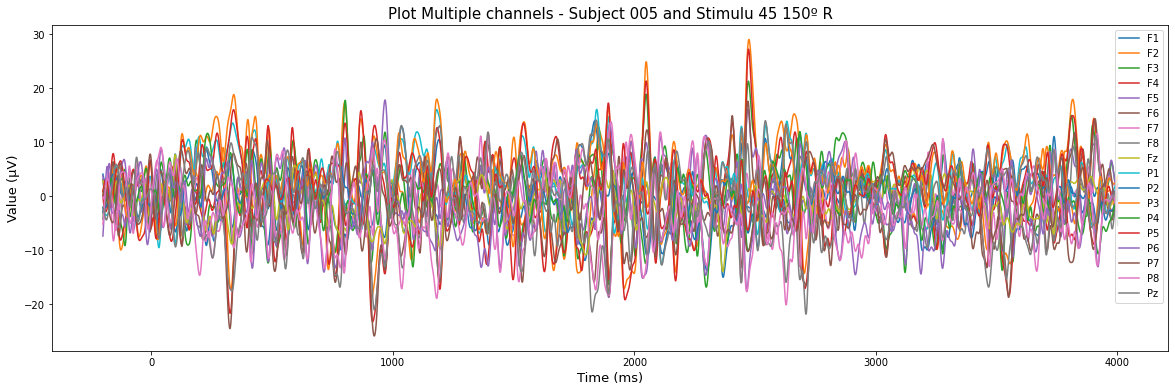

In [29]:
subject_id1 = '0005'
stimulu1 = 'Stimulus/45_150_R'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu1, EEG_trials)
plot_2D(raw_data,'Subject 005 and Stimulu 45 150º R')

In [12]:
#plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a2'>3.1.3 Amostra de dados: sujeito 5, estímulo 45 (150º, iguais)</a>

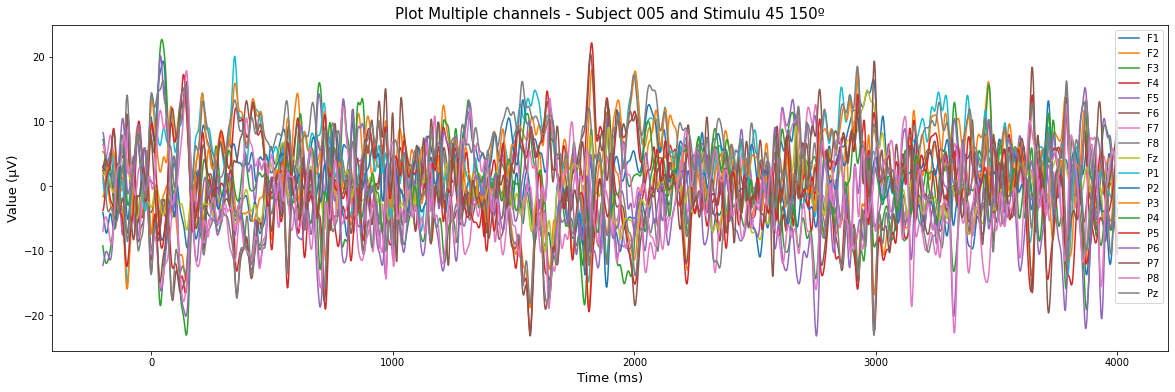

In [30]:
subject_id1 = '0005'
stimulu2 = 'Stimulus/45_150'

S_sample_df, raw_data = subject_trial_data(subject_id1, stimulu2, EEG_trials)

plot_2D(raw_data,'Subject 005 and Stimulu 45 150º')

In [14]:
#plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a3'>3.1.4 Amostra de dados: sujeito 7, estímulo 10 (0º, diferentes)</a>

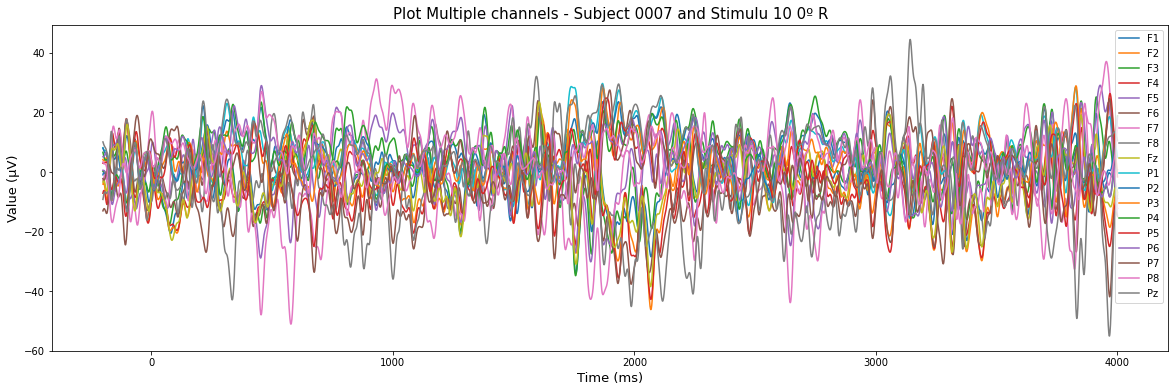

In [31]:
subject_id2 = '0007'
stimulu3 = 'Stimulus/10_0_R'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu3, EEG_trials)
plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º R')

In [16]:
#plot_3dSurface_and_heatmap(S_sample_df)

##### <a id='s1_a4'>3.1.5 Amostra de dados: sujeito 7, estímulo 10 (0º, iguais)</a>

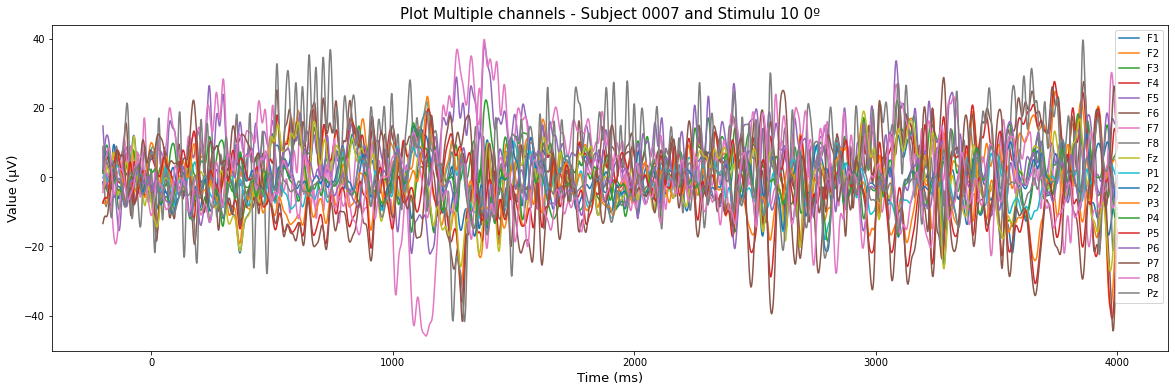

In [32]:
subject_id2 = '0007'
stimulu4 = 'Stimulus/10_0'

S_sample_df, raw_data = subject_trial_data(subject_id2, stimulu4, EEG_trials)
plot_2D(raw_data,'Subject 0007 and Stimulu 10 0º')

In [18]:
#plot_3dSurface_and_heatmap(S_sample_df)

#### <a id='s2'>3.2. Amostra de dados evocados</a>

In [19]:
subs = EEG_evoked['subject_id'].unique()
print(f'Dados evocados de todos os {len(subs)} sujeitos.')

Dados evocados de todos os 19 sujeitos.


##### <a id='s2_funcs'>3.2.1 Funções</a>

In [20]:
def evoked_data(subject_id, EEG_data):
    sensor_positions = EEG_data.columns[3:]
    channels = [i for i in range(len(sensor_positions))]

    subject_df = EEG_data[EEG_data['subject_id'] == subject_id]
    
    #reorganizar em colunas sensor_position e sensor_value
    subject_df_info = subject_df.drop(subject_df.columns[3:], axis=1)
    subject_df_sensor_values = subject_df.drop(subject_df.columns[:3], axis=1)

    sensorT_df = pd.DataFrame(columns=['subject_id','group','time',
                                        'channel','sensor_position', 'sensor_value'])

    for i in range(len(subject_df_sensor_values)):
        temp_df = pd.DataFrame({'channel': channels,
                                'sensor_position': subject_df_sensor_values.iloc[i].T.index.tolist(),
                                'sensor_value': subject_df_sensor_values.iloc[i].T.values})
        
        for col in subject_df_info.columns:
            temp_df[col] = subject_df_info.iloc[i][col]

        temp_df = pd.concat([temp_df[['subject_id','group','time']],
                             temp_df[['channel','sensor_position','sensor_value']]], axis=1)

        sensorT_df = pd.concat([sensorT_df, temp_df], ignore_index=True)

    groups_idxs = sensorT_df.groupby('channel')['time'].apply(lambda x: x.index.tolist())
    idxs = []
    for index, value in groups_idxs.items():
        idxs += value
    sensorT_df = sensorT_df.iloc[idxs].reset_index(drop=True)

    channel = sensorT_df['channel'].iloc[0]
    cont_sample_num = 0
    sample_num = []
    for i in range(len(sensorT_df)):
        if sensorT_df['channel'].iloc[i] == channel:
            cont_sample_num += 1
        else:
            sample_num += [i for i in range(cont_sample_num)]
            cont_sample_num = 1
            channel = sensorT_df['channel'].iloc[i]
        if i == len(sensorT_df)-1:
            sample_num += [i for i in range(cont_sample_num)]

    sensorT_df.insert(2, 'sample_num', sample_num)

    sensorT_df['time'] = sensorT_df['time'].astype(float)
    sensorT_df['channel'] = sensorT_df['channel'].astype(int)
    sensorT_df['sensor_value'] = sensorT_df['sensor_value'].astype(float)

    df_data = sensorT_df[['sensor_position', 'time', 'sensor_value']]
    raw_data = pd.pivot_table(df_data, values='sensor_value', index='time', columns='sensor_position', aggfunc='mean')

    return sensorT_df, raw_data

In [21]:
def mean_evokeds(EEG_data):
    sensor_positions = EEG_data.columns[3:]
    channels = [i for i in range(len(sensor_positions))]
    group = EEG_data['group'].unique()[0]
    time = EEG_data['time'].unique()
    mean_subjects = EEG_data.groupby(axis=0, by='time').mean()

    sensorT_df = pd.DataFrame(columns=['group','time','channel','sensor_position', 'sensor_value'])

    for i in range(len(mean_subjects)):
        temp_df = pd.DataFrame({'channel': channels,
                                'sensor_position': mean_subjects.iloc[i].T.index.tolist(),
                                'sensor_value': mean_subjects.iloc[i].T.values})
        temp_df.insert(0, 'time', time[i])
        temp_df.insert(0, 'group', group)

        sensorT_df = pd.concat([sensorT_df, temp_df], ignore_index=True)

    groups_idxs = sensorT_df.groupby('channel')['time'].apply(lambda x: x.index.tolist())
    idxs = []
    for index, value in groups_idxs.items():
        idxs += value
    sensorT_df = sensorT_df.iloc[idxs].reset_index(drop=True)

    channel = sensorT_df['channel'].iloc[0]
    cont_sample_num = 0
    sample_num = []
    for i in range(len(sensorT_df)):
        if sensorT_df['channel'].iloc[i] == channel:
            cont_sample_num += 1
        else:
            sample_num += [i for i in range(cont_sample_num)]
            cont_sample_num = 1
            channel = sensorT_df['channel'].iloc[i]
        if i == len(sensorT_df)-1:
            sample_num += [i for i in range(cont_sample_num)]

    sensorT_df.insert(1, 'sample_num', sample_num)

    sensorT_df['time'] = sensorT_df['time'].astype(float)
    sensorT_df['channel'] = sensorT_df['channel'].astype(int)
    sensorT_df['sensor_value'] = sensorT_df['sensor_value'].astype(float)

    df_data = sensorT_df[['sensor_position', 'time', 'sensor_value']]
    raw_data = pd.pivot_table(df_data, values='sensor_value', index='time', columns='sensor_position', aggfunc='mean')

    return sensorT_df, raw_data

In [ ]:
class Subplot3D:
  def __init__(self, nrows, ncols) -> None:
      plt.figure(figsize=(18,14))
    
  def subplot(self, index):

##### <a id='s2_a1'>3.2.2 Amostra da média dos trials: sujeito 0005</a>

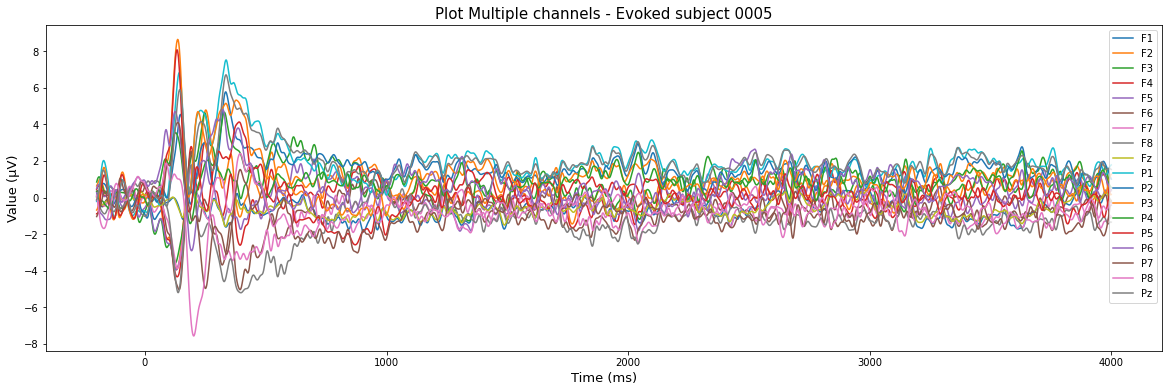

In [33]:
subject_id = '0005'
S_sample_df, raw_data = evoked_data(subject_id, EEG_evoked)
plot_2D(raw_data,'Evoked subject 0005')

In [23]:
#plot_3dSurface_and_heatmap(S_sample_df, 'evoked')

##### <a id='s2_a2'>3.2.3 Amostra das médias dos sujeitos do grupo controle</a>

In [24]:
sensors_left = ['F7', 'F5', 'F3', 'F1', 'P7', 'P5', 'P3', 'P1']
sensor_right = ['F8', 'F6', 'F4', 'F2', 'P8', 'P6', 'P4', 'P2']
sensor_frontal = ['F7', 'F5', 'F3', 'F1','F8', 'F6', 'F4', 'F2']
sensor_parietal = ['P7', 'P5', 'P3', 'P1', 'P8', 'P6', 'P4', 'P2']

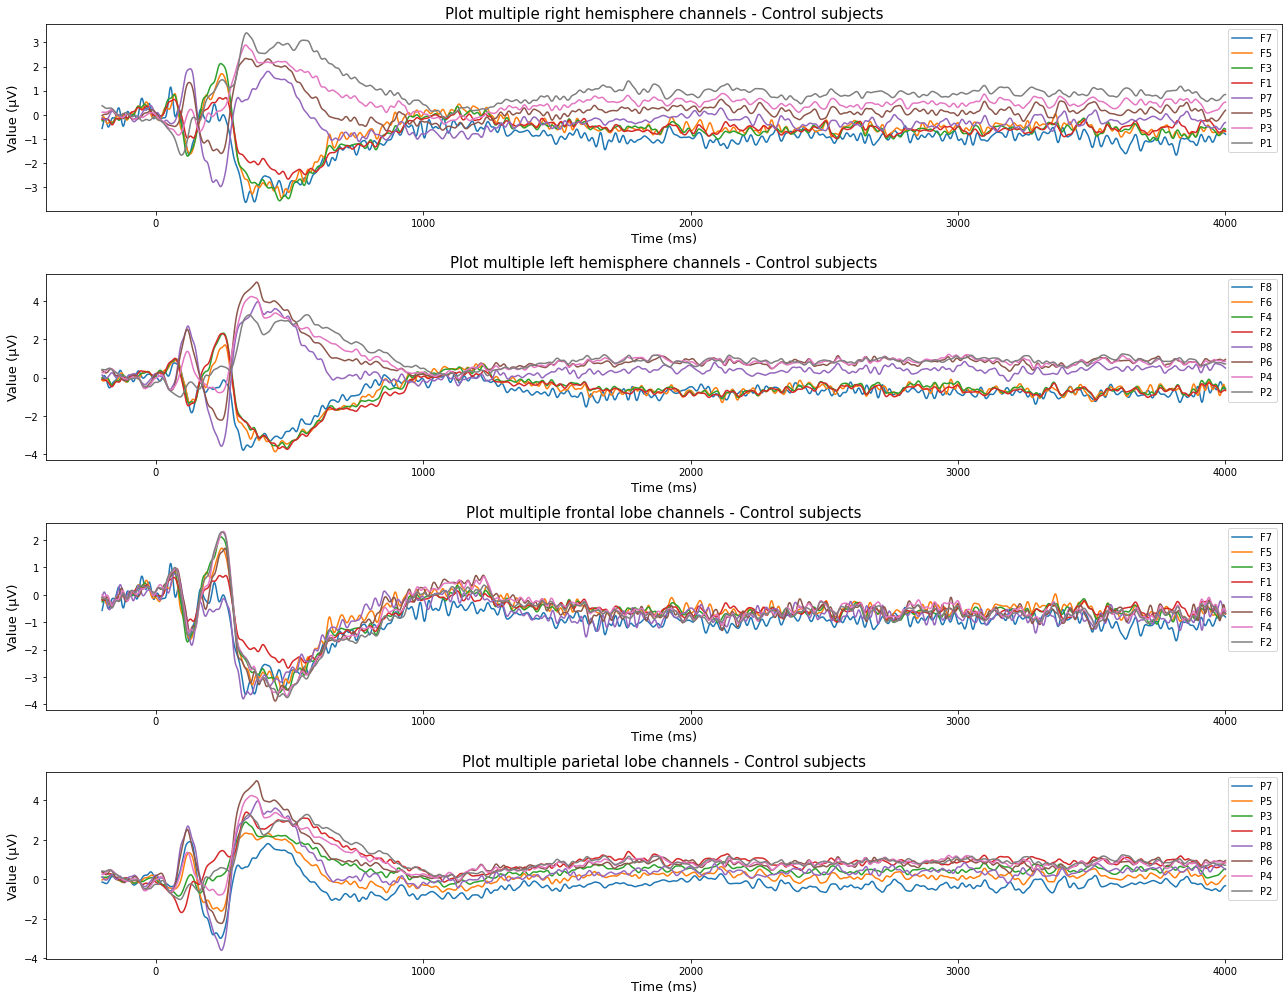

In [34]:
control_subjects = EEG_evoked[EEG_evoked['group'] == 'control']
S_sample_df, raw_data = mean_evokeds(control_subjects)

raw_data_left = raw_data[sensors_left]
raw_data_rigth = raw_data[sensor_right]
raw_data_frontal = raw_data[sensor_frontal]
raw_data_parietal = raw_data[sensor_parietal]

plt.figure(figsize=(18,14))

x1 = raw_data_left.index.values
axe1 = plt.subplot(411)
for i in range(len(raw_data_left.columns)):
    axe1.plot(x1, raw_data_left[raw_data_left.columns[i]], label=raw_data_left.columns[i])
axe1.legend()
axe1.set_title(f'Plot multiple right hemisphere channels - Control subjects', fontsize=15)
axe1.set_xlabel("Time (ms)",fontsize=13)
axe1.set_ylabel("Value (µV)",fontsize=13)

x2 = raw_data_rigth.index.values
axe2 = plt.subplot(412, sharex=axe1)
for i in range(len(raw_data_rigth.columns)):
    axe2.plot(x2, raw_data_rigth[raw_data_rigth.columns[i]], label=raw_data_rigth.columns[i])
axe2.legend()
axe2.set_title(f'Plot multiple left hemisphere channels - Control subjects',fontsize=15)
axe2.set_xlabel("Time (ms)",fontsize=13)
axe2.set_ylabel("Value (µV)",fontsize=13)

x3 = raw_data_frontal.index.values
axe3 = plt.subplot(413, sharex=axe1)
for i in range(len(raw_data_frontal.columns)):
    axe3.plot(x3, raw_data_frontal[raw_data_frontal.columns[i]], label=raw_data_frontal.columns[i])
axe3.legend()
axe3.set_title(f'Plot multiple frontal lobe channels - Control subjects',fontsize=15)
axe3.set_xlabel("Time (ms)",fontsize=13)
axe3.set_ylabel("Value (µV)",fontsize=13)

x4 = raw_data_parietal.index.values
axe4 = plt.subplot(414, sharex=axe1)
for i in range(len(raw_data_parietal.columns)):
    axe4.plot(x4, raw_data_parietal[raw_data_parietal.columns[i]], label=raw_data_parietal.columns[i])
axe4.legend()
axe4.set_title(f'Plot multiple parietal lobe channels - Control subjects',fontsize=15)
axe4.set_xlabel("Time (ms)",fontsize=13)
axe4.set_ylabel("Value (µV)",fontsize=13)
plt.tight_layout()
plt.show()

##### <a id='s2_a3'>3.2.4 Amostra das médias dos sujeitos do grupo superdotado</a>

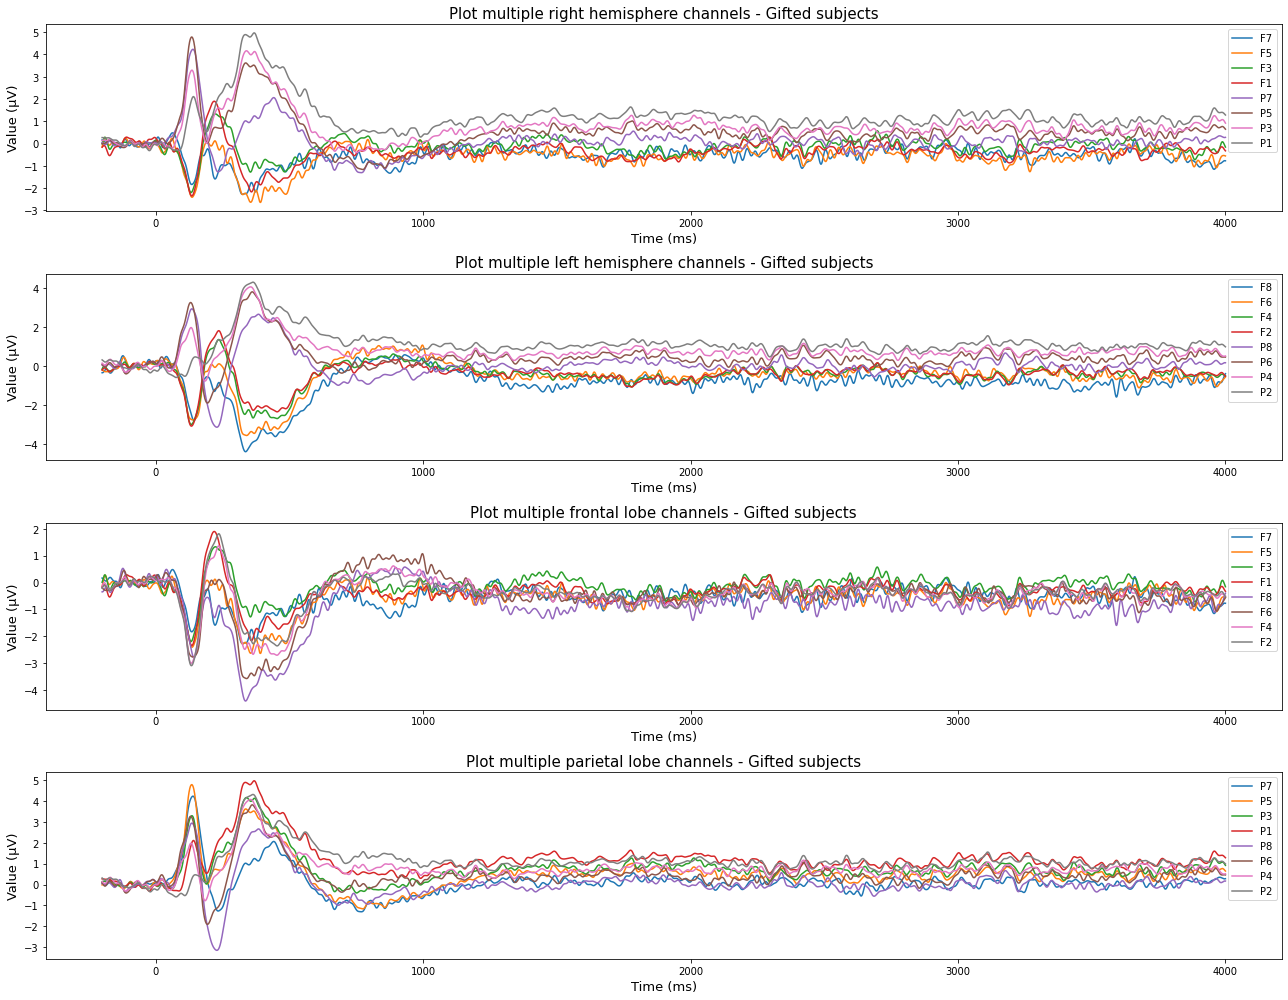

In [26]:
gifted_subjects = EEG_evoked[EEG_evoked['group'] == 'gifted']
S_sample_df, raw_data = mean_evokeds(gifted_subjects)

raw_data_left = raw_data[sensors_left]
raw_data_rigth = raw_data[sensor_right]
raw_data_frontal = raw_data[sensor_frontal]
raw_data_parietal = raw_data[sensor_parietal]

plt.figure(figsize=(18,14))

x1 = raw_data_left.index.values
axe1 = plt.subplot(411)
for i in range(len(raw_data_left.columns)):
    axe1.plot(x1, raw_data_left[raw_data_left.columns[i]], label=raw_data_left.columns[i])
axe1.legend()
axe1.set_title(f'Plot multiple right hemisphere channels - Gifted subjects', fontsize=15)
axe1.set_xlabel("Time (ms)",fontsize=13)
axe1.set_ylabel("Value (µV)",fontsize=13)

x2 = raw_data_rigth.index.values
axe2 = plt.subplot(412, sharex=axe1)
for i in range(len(raw_data_rigth.columns)):
    axe2.plot(x2, raw_data_rigth[raw_data_rigth.columns[i]], label=raw_data_rigth.columns[i])
axe2.legend()
axe2.set_title(f'Plot multiple left hemisphere channels - Gifted subjects',fontsize=15)
axe2.set_xlabel("Time (ms)",fontsize=13)
axe2.set_ylabel("Value (µV)",fontsize=13)

x3 = raw_data_frontal.index.values
axe3 = plt.subplot(413, sharex=axe1)
for i in range(len(raw_data_frontal.columns)):
    axe3.plot(x3, raw_data_frontal[raw_data_frontal.columns[i]], label=raw_data_frontal.columns[i])
axe3.legend()
axe3.set_title(f'Plot multiple frontal lobe channels - Gifted subjects',fontsize=15)
axe3.set_xlabel("Time (ms)",fontsize=13)
axe3.set_ylabel("Value (µV)",fontsize=13)

x4 = raw_data_parietal.index.values
axe4 = plt.subplot(414, sharex=axe1)
for i in range(len(raw_data_parietal.columns)):
    axe4.plot(x4, raw_data_parietal[raw_data_parietal.columns[i]], label=raw_data_parietal.columns[i])
axe4.legend()
axe4.set_title(f'Plot multiple parietal lobe channels - Gifted subjects',fontsize=15)
axe4.set_xlabel("Time (ms)",fontsize=13)
axe4.set_ylabel("Value (µV)",fontsize=13)
plt.tight_layout()
plt.show()